# Comparing two means

---
## t-test

We use the **independent 2-sample t-test** to assess whether two samples taken from normal distributions have significantly different means. 

The test statistic follows a Student's t-distribution, provided that the variances of the two groups are equal.

Other variants of the t-test are applicable under different conditions.

The test statistic is

$$ t = \frac{\bar{X}_{1} - \bar{X}_{2}}{s_p \cdot \sqrt{\frac{1}{n_{1}} + \frac{1}{n_{2}}}} $$

where

$$ s_p = \sqrt{\frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}} $$

is an estimator of the pooled standard deviation.

Under the null hypothesis of equal means, the statistic follows a Student's t-distribution with $(n_{1} + n_{2} - 2)$ degrees of freedom.

### Example

The birth weights of babies (in kg) have been measured for a sample of mothers split into two categories: nonsmoking and heavy smoking.

- The two categories are measured independently from each other. 
- Both come from normal distributions
- The two groups are assumed to have the same unknown variance.

The data are found in the file *birthweight.csv*.



In [2]:
import pandas as pd
data = pd.read_csv('birthweight.csv')
data

,smoking,birthweight
0,False,3.99
1,False,3.79
2,False,3.60
3,False,3.73
4,False,3.21
5,False,3.60
6,False,4.08
7,False,3.61
8,False,3.83
9,False,3.31


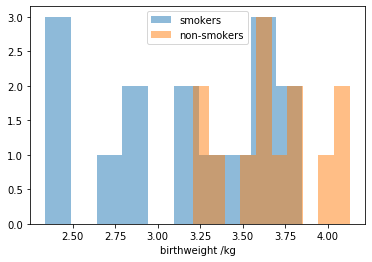

In [4]:
import matplotlib.pyplot as plt

plt.hist(data.query('smoking == True').birthweight, alpha = 0.5, label='smokers')
plt.hist(data.query('smoking == False').birthweight, alpha = 0.5, label='non-smokers')
plt.xlabel('birthweight /kg')
plt.legend()
plt.show()

We want to know whether there is a significant difference in mean birth weight between the two categories. 

In [39]:
data.groupby('smoking').mean()

,birthweight
smoking,
False,3.667692
True,3.152000


There is clearly some difference in the sample means. However, with not many data in the study, we need to demonstrate that the difference is meaningful and not just due to random chance.

Write down the hypotheses:

* $H_0$: there is no difference in mean birth weight between the two populations, $\mu_{smoking} = \mu_{nonsmoking}$
* $H_1$: there is a real difference between the two populations, $\mu_{smoking} \ne \mu_{nonsmoking}$

choose a significance level:
$\alpha = 0.05$

In [42]:
from scipy.stats import ttest_ind
ttest_ind( data.query('smoking == True').birthweight,
           data.query('smoking == False').birthweight )

Ttest_indResult(statistic=-3.1792634349413422, pvalue=0.0037925803848699916)

The p-value is less than our chosen significance level, so we reject the null hypothesis. We can report that there is a significant difference between the population means.

### Exercise
Is there a significant difference between the sepal widths of the species *Iris versicolor* and *Iris virginica*? (the data is in *iris.csv*)

In [3]:
iris = pd.read_csv('iris.csv')
iris

,sepal.length,sepal.width,petal.length,petal.width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


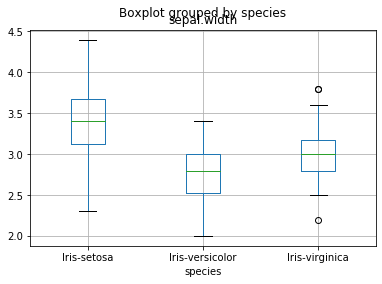

In [12]:
iris.boxplot('sepal.width',by='species')


### Paired observations

Sometimes we have two samples with paired observations (for example, luminosity of the same set of stars, as measured on two different dates). This situation requires testing whether the *mean of the differences* between pairs is zero, which is called a [*paired two-sample t-test*](https://en.wikipedia.org/wiki/Student%27s_t-test#Dependent_t-test_for_paired_samples).



---
## Alternatives to the t-test

### Mann-Whitney U-test

For non-normal samples where $n$ is small, the assumptions of the t-test break down. However, we can use a *non-parametric test* to compare two samples, whatever the shape of their distributions.

The [*Mann-Whitney U-test*](https://en.wikipedia.org/wiki/Mann–Whitney_U_test) (aka Wilcoxon rank-sum test) is one such test. The null hypothesis for this test is that a randomly selected value from sample 1 is equally likely to be less than or greater than a randomly selected value from sample 2. If the distributions are sufficiently different, the resulting p-value will be small and we will reject this null hypothesis. Note that the U-test does not compare the sample means directly.


### Wilcoxon signed-rank test

The [*Wilcoxon signed-rank test*](https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test) is is the paired-sample version of the Mann-Whitney U-test.


---